In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better readability
pd.set_option("display.float_format", "{:.2f}".format)
sns.set_style("whitegrid")


In [9]:
# Load the dataset
file_path = "/kaggle/input/nyc-data/Final_NYC_Housing_Dataset.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,DATE,ZHVI,YOY_CHANGE,SALES_VOLUME,INVENTORY,DOM,MORTGAGE,POPULATION,UNEMPLOYMENT_RATE,MEDIAN_INCOME,CPI,MARKET_HEAT_INDEX,GOOGLE_TREND,CONSUMER_SENTIMENT
0,2018-03,652524.01,7.76,14047,73707,68,4.44,NaN,4.30,NaN,249.58,55,67,101.40
1,2018-04,656864.55,7.47,14780,80345,65,4.47,NaN,4.20,NaN,250.23,56,55,98.80
2,2018-05,661945.94,7.63,16869,85864,63,4.59,NaN,4.10,NaN,250.79,55,62,98.00
3,2018-06,665867.50,7.63,19562,90067,64,4.57,NaN,4.00,NaN,251.02,52,63,98.20
4,2018-07,669849.79,7.82,19467,91881,66,4.53,NaN,3.90,NaN,251.21,53,68,97.90


In [10]:
# Display dataset information
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                83 non-null     object 
 1   ZHVI                83 non-null     float64
 2   YOY_CHANGE          83 non-null     float64
 3   SALES_VOLUME        83 non-null     int64  
 4   INVENTORY           83 non-null     int64  
 5   DOM                 83 non-null     int64  
 6   MORTGAGE            83 non-null     float64
 7   POPULATION          6 non-null      float64
 8   UNEMPLOYMENT_RATE   82 non-null     float64
 9   MEDIAN_INCOME       5 non-null      float64
 10  CPI                 83 non-null     float64
 11  MARKET_HEAT_INDEX   83 non-null     int64  
 12  GOOGLE_TREND        83 non-null     int64  
 13  CONSUMER_SENTIMENT  83 non-null     float64
dtypes: float64(8), int64(5), object(1)
memory usage: 9.2+ KB


DATE                   0
ZHVI                   0
YOY_CHANGE             0
SALES_VOLUME           0
INVENTORY              0
DOM                    0
MORTGAGE               0
POPULATION            77
UNEMPLOYMENT_RATE      1
MEDIAN_INCOME         78
CPI                    0
MARKET_HEAT_INDEX      0
GOOGLE_TREND           0
CONSUMER_SENTIMENT     0
dtype: int64

In [11]:
# Drop unnecessary columns if they exist
df.drop(columns=["Unnamed: 0", "CITY"], errors="ignore", inplace=True)

# Convert DATE to datetime format
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y-%m")

# Set DATE as index (important for time-series analysis)
df.set_index("DATE", inplace=True)

# Check data types after conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2018-03-01 to 2025-01-01
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZHVI                83 non-null     float64
 1   YOY_CHANGE          83 non-null     float64
 2   SALES_VOLUME        83 non-null     int64  
 3   INVENTORY           83 non-null     int64  
 4   DOM                 83 non-null     int64  
 5   MORTGAGE            83 non-null     float64
 6   POPULATION          6 non-null      float64
 7   UNEMPLOYMENT_RATE   82 non-null     float64
 8   MEDIAN_INCOME       5 non-null      float64
 9   CPI                 83 non-null     float64
 10  MARKET_HEAT_INDEX   83 non-null     int64  
 11  GOOGLE_TREND        83 non-null     int64  
 12  CONSUMER_SENTIMENT  83 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 9.1 KB


In [12]:
# Forward-fill missing values for yearly reported data
df["POPULATION"].fillna(method="ffill", inplace=True)
df["MEDIAN_INCOME"].fillna(method="ffill", inplace=True)

# Forward-fill missing UNEMPLOYMENT_RATE (if any missing values)
df["UNEMPLOYMENT_RATE"].fillna(method="ffill", inplace=True)

# Verify missing values after filling
df.isnull().sum()


<ipython-input-12-51f1443fe825>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["POPULATION"].fillna(method="ffill", inplace=True)
<ipython-input-12-51f1443fe825>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["POPULATION"].fillna(method="ffill", inplace=True)
<ipython-input-12-51f1443fe825>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The beha

ZHVI                   0
YOY_CHANGE             0
SALES_VOLUME           0
INVENTORY              0
DOM                    0
MORTGAGE               0
POPULATION            10
UNEMPLOYMENT_RATE      0
MEDIAN_INCOME         10
CPI                    0
MARKET_HEAT_INDEX      0
GOOGLE_TREND           0
CONSUMER_SENTIMENT     0
dtype: int64

In [13]:
# Summary statistics of numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ZHVI,83.00,718748.07,30670.02,652524.01,696280.53,722115.53,738442.88,781608.40
YOY_CHANGE,83.00,2.50,3.95,-6.40,0.64,2.62,5.29,7.93
SALES_VOLUME,83.00,15674.34,3830.32,8940.00,12561.00,15249.00,18930.00,23975.00
INVENTORY,83.00,63822.34,18654.39,33607.00,45172.00,63984.00,79268.50,97260.00
DOM,83.00,70.55,15.62,46.00,58.00,67.00,81.00,109.00
MORTGAGE,83.00,4.81,1.58,2.68,3.38,4.53,6.46,7.62
POPULATION,73.00,19788.58,194.18,19463.13,19703.75,19848.28,19867.25,20105.17
UNEMPLOYMENT_RATE,83.00,5.41,2.68,3.70,4.00,4.30,5.35,16.70
MEDIAN_INCOME,73.00,75507.95,4906.68,68660.00,71850.00,75910.00,81600.00,81600.00
CPI,83.00,279.42,23.92,249.58,256.74,272.75,303.09,319.09


## MIN-MAX Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to scale
cols_to_scale = ["ZHVI", "SALES_VOLUME", "INVENTORY", "DOM", "MORTGAGE", 
                 "POPULATION", "UNEMPLOYMENT_RATE", "MEDIAN_INCOME", 
                 "CPI", "MARKET_HEAT_INDEX", "GOOGLE_TREND", "CONSUMER_SENTIMENT"]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Check transformed data
df_scaled.head()


,ZHVI,YOY_CHANGE,SALES_VOLUME,INVENTORY,DOM,MORTGAGE,POPULATION,UNEMPLOYMENT_RATE,MEDIAN_INCOME,CPI,MARKET_HEAT_INDEX,GOOGLE_TREND,CONSUMER_SENTIMENT
DATE,,,,,,,,,,,,,
2018-03-01,0.00,7.76,0.34,0.63,0.35,0.36,NaN,0.05,NaN,0.00,0.15,0.50,1.00
2018-04-01,0.03,7.47,0.39,0.73,0.30,0.36,NaN,0.04,NaN,0.01,0.17,0.29,0.95
2018-05-01,0.07,7.63,0.53,0.82,0.27,0.39,NaN,0.03,NaN,0.02,0.15,0.41,0.93
2018-06-01,0.10,7.63,0.71,0.89,0.29,0.38,NaN,0.02,NaN,0.02,0.09,0.43,0.94
2018-07-01,0.13,7.82,0.70,0.92,0.32,0.37,NaN,0.02,NaN,0.02,0.11,0.52,0.93


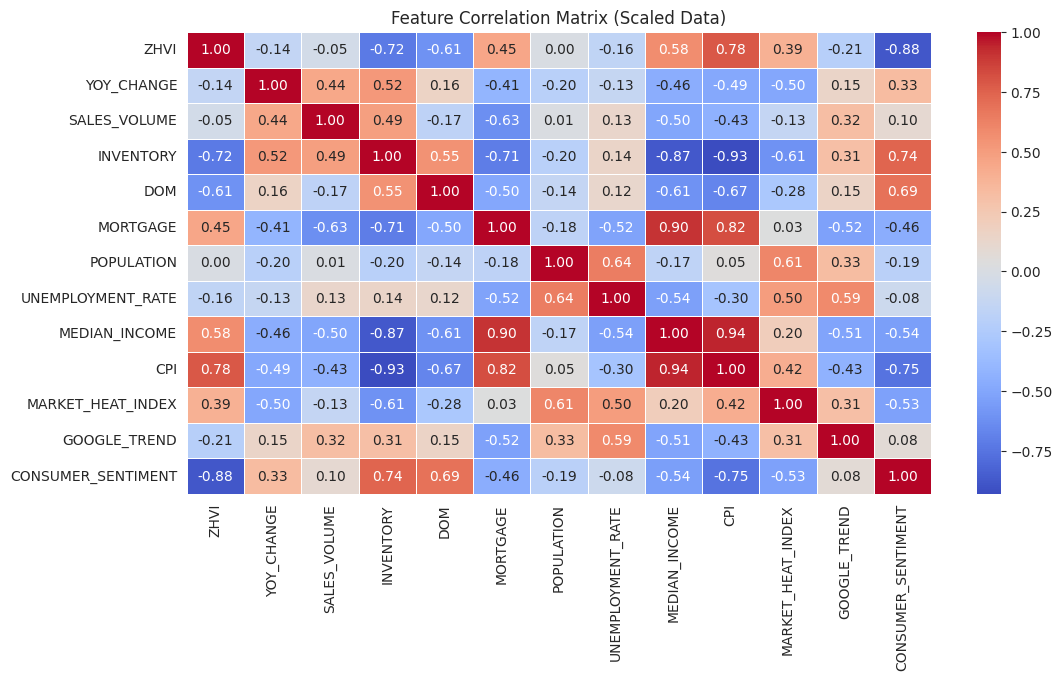

In [15]:
# Compute correlation matrix for scaled data
corr_matrix_scaled = df_scaled.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix_scaled, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix (Scaled Data)")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

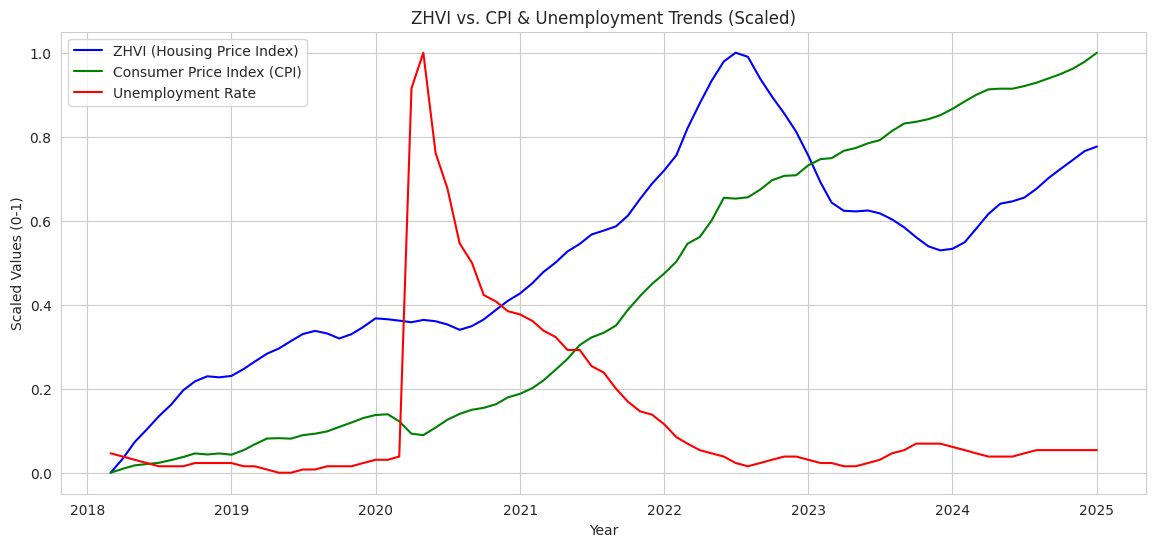

In [16]:
plt.figure(figsize=(14, 6))

# Plot Scaled ZHVI vs. CPI & Unemployment
sns.lineplot(data=df_scaled, x=df_scaled.index, y="ZHVI", label="ZHVI (Housing Price Index)", color="blue")
sns.lineplot(data=df_scaled, x=df_scaled.index, y="CPI", label="Consumer Price Index (CPI)", color="green")
sns.lineplot(data=df_scaled, x=df_scaled.index, y="UNEMPLOYMENT_RATE", label="Unemployment Rate", color="red")

plt.title("ZHVI vs. CPI & Unemployment Trends (Scaled)")
plt.xlabel("Year")
plt.ylabel("Scaled Values (0-1)")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

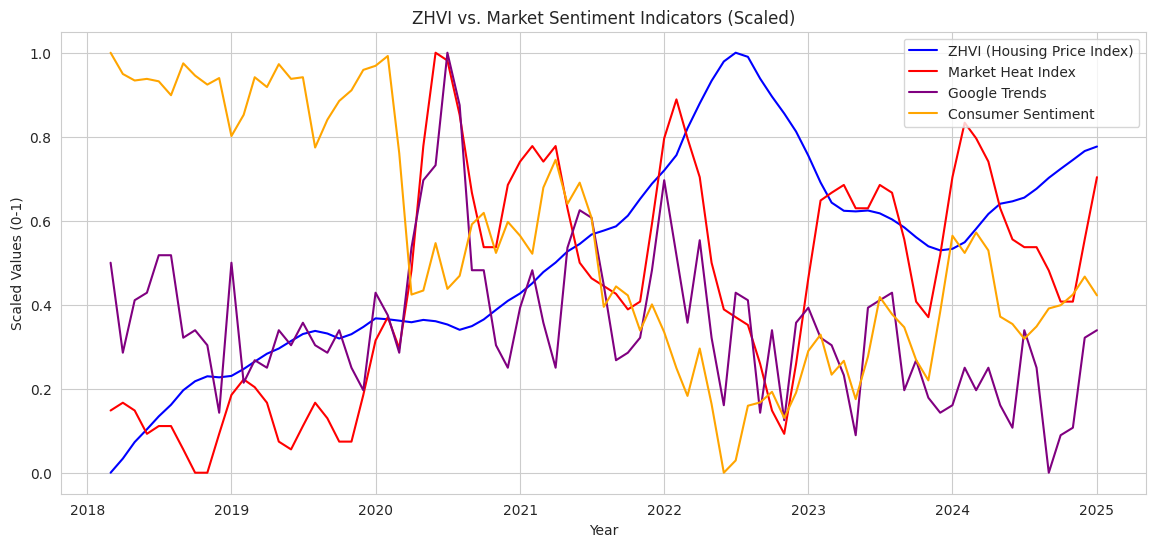

In [17]:
plt.figure(figsize=(14, 6))

# Plot ZHVI vs Market Sentiment Indicators
sns.lineplot(data=df_scaled, x=df_scaled.index, y="ZHVI", label="ZHVI (Housing Price Index)", color="blue")
sns.lineplot(data=df_scaled, x=df_scaled.index, y="MARKET_HEAT_INDEX", label="Market Heat Index", color="red")
sns.lineplot(data=df_scaled, x=df_scaled.index, y="GOOGLE_TREND", label="Google Trends", color="purple")
sns.lineplot(data=df_scaled, x=df_scaled.index, y="CONSUMER_SENTIMENT", label="Consumer Sentiment", color="orange")

plt.title("ZHVI vs. Market Sentiment Indicators (Scaled)")
plt.xlabel("Year")
plt.ylabel("Scaled Values (0-1)")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

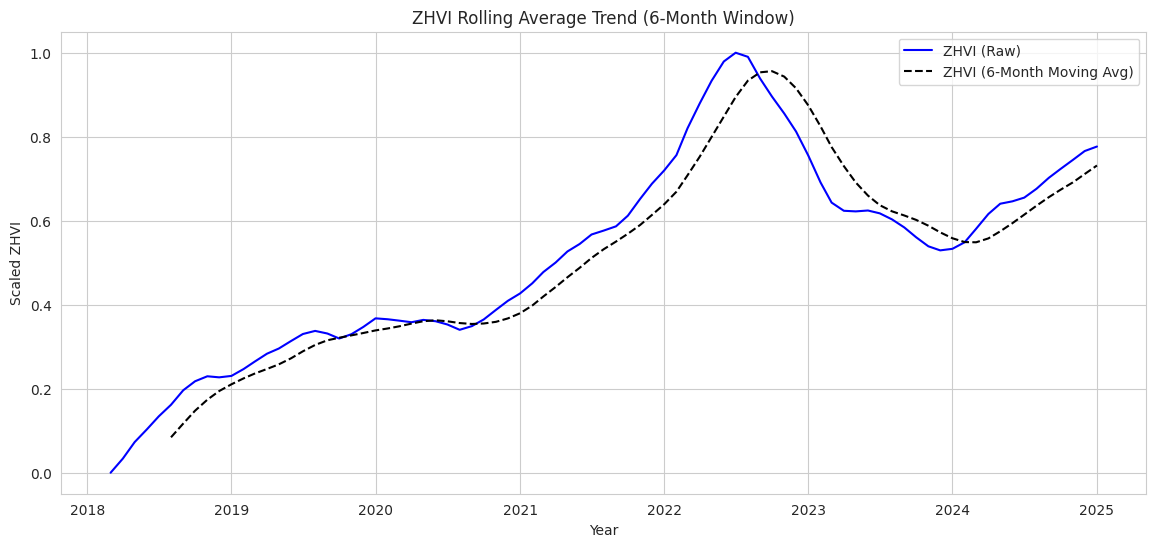

In [18]:
df_scaled["ZHVI_ROLLING_MEAN"] = df_scaled["ZHVI"].rolling(window=6).mean()

plt.figure(figsize=(14, 6))

# Plot ZHVI with rolling average
sns.lineplot(data=df_scaled, x=df_scaled.index, y="ZHVI", label="ZHVI (Raw)", color="blue")
sns.lineplot(data=df_scaled, x=df_scaled.index, y="ZHVI_ROLLING_MEAN", label="ZHVI (6-Month Moving Avg)", color="black", linestyle="dashed")

plt.title("ZHVI Rolling Average Trend (6-Month Window)")
plt.xlabel("Year")
plt.ylabel("Scaled ZHVI")
plt.legend()
plt.show()
